In [1]:
! python3 -m pip install -U tensorflow==2.0.0a0 > /dev/null
from utils import *

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# MNIST without batch normalization
from tensorflow import keras

# Download and set train/test/validation datasets
(X_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Full train dataset shape", X_train_full.shape)
print("Train dataset dtype", X_train_full.dtype)

# Notice this datasets are not normalized
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

epochs = 20
batch_size = 32

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ec2-user/anaconda3/envs/python3

Full train dataset shape (60000, 28, 28)
Train dataset dtype uint8


In [3]:
# Let's define the network. First without BatchNormalization
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history_wo_batch_normalization = model.fit(X_train, y_train, batch_size=batch_size,
                        epochs=epochs, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[keras.callbacks.TensorBoard(get_run_logidr())])

# Finally save the model
model.save("mnist_no_batchnorm.h5")

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 86us/sample - loss: 1.8029 - accuracy: 0.5463 - val_loss: 1.2652 - val_accuracy: 0.7678
Epoch 2/20
55000/55000 [==============================] - 4s 82us/sample - loss: 0.9429 - accuracy: 0.8069 - val_loss: 0.7036 - val_accuracy: 0.8472
Epoch 3/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.6204 - accuracy: 0.8544 - val_loss: 0.5243 - val_accuracy: 0.8752
Epoch 4/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.5010 - accuracy: 0.8731 - val_loss: 0.4438 - val_accuracy: 0.8864
Epoch 5/20
55000/55000 [==============================] - 4s 82us/sample - loss: 0.4403 - accuracy: 0.8830 - val_loss: 0.3975 - val_accuracy: 0.8960
Epoch 6/20
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4027 - accuracy: 0.8908 - val_loss: 0.3679 - val_accuracy: 0.9012
Epoch 7/20
55000/55000 [==============================] -

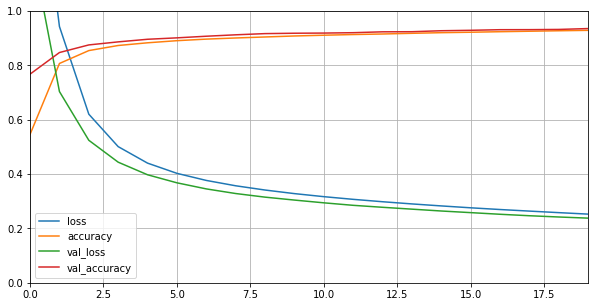

In [4]:
draw_history(history_wo_batch_normalization)

In [5]:
# Now let's define a network that uses batch normalization

# Let's define the network. First without BatchNormalization
model2 = keras.models.Sequential()

model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history_w_batch_normalization = model2.fit(X_train, y_train, batch_size=batch_size,
                        epochs=epochs, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[keras.callbacks.TensorBoard(get_run_logidr())])

# Finally save the model
model2.save("mnist_w_batchnorm.h5")

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 8s 138us/sample - loss: 0.8400 - accuracy: 0.7440 - val_loss: 0.4593 - val_accuracy: 0.8666
Epoch 2/20
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4308 - accuracy: 0.8744 - val_loss: 0.3422 - val_accuracy: 0.9010
Epoch 3/20
55000/55000 [==============================] - 7s 124us/sample - loss: 0.3494 - accuracy: 0.8983 - val_loss: 0.2903 - val_accuracy: 0.9174
Epoch 4/20
55000/55000 [==============================] - 7s 124us/sample - loss: 0.3069 - accuracy: 0.9105 - val_loss: 0.2569 - val_accuracy: 0.9258
Epoch 5/20
55000/55000 [==============================] - 7s 124us/sample - loss: 0.2771 - accuracy: 0.9193 - val_loss: 0.2365 - val_accuracy: 0.9288
Epoch 6/20
55000/55000 [==============================] - 7s 124us/sample - loss: 0.2581 - accuracy: 0.9249 - val_loss: 0.2198 - val_accuracy: 0.9340
Epoch 7/20
55000/55000 [===========================

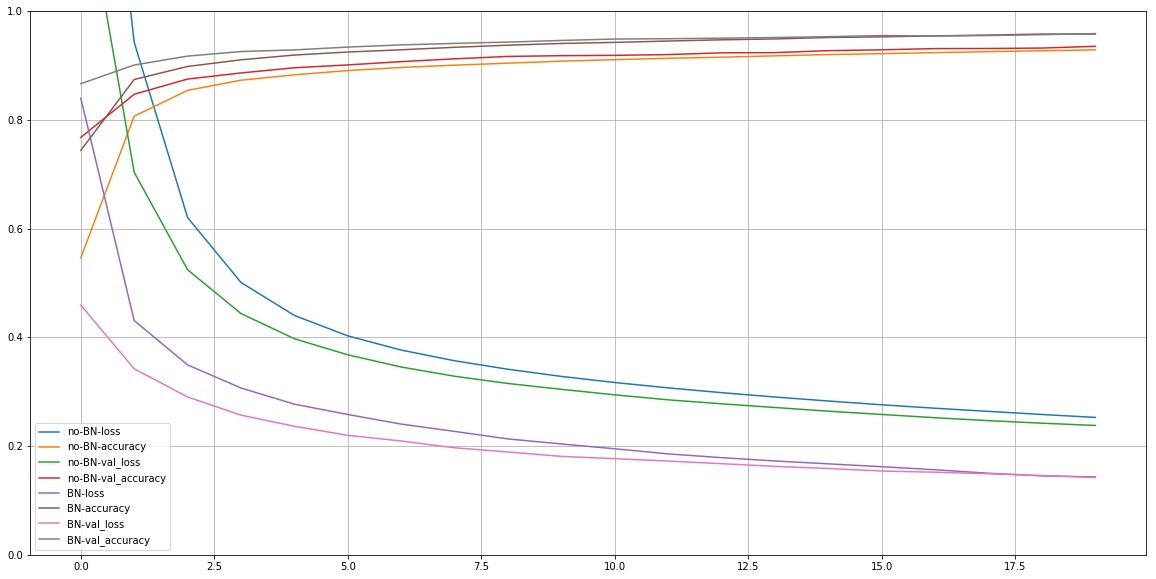

In [6]:
draw_histories([history_wo_batch_normalization, history_w_batch_normalization], 
               ["no-BN", "BN"])

In [7]:
# Let's use ELU and he_normal initializer
# Now let's define a network that uses batch normalization

# Let's define the network. First without BatchNormalization
model3 = keras.models.Sequential()

model3.add(keras.layers.Flatten(input_shape=[28,28]))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history_w_batch_normalization_elu = model3.fit(X_train, y_train, batch_size=batch_size,
                            epochs=epochs, 
                            validation_data=(X_valid, y_valid),
                            callbacks=[keras.callbacks.TensorBoard(get_run_logidr())])

# Finally save the model
model3.save("mnist_w_batchnorm_elu.h5")

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 7s 135us/sample - loss: 0.8441 - accuracy: 0.7436 - val_loss: 0.4774 - val_accuracy: 0.8606
Epoch 2/20
55000/55000 [==============================] - 7s 126us/sample - loss: 0.4610 - accuracy: 0.8657 - val_loss: 0.3794 - val_accuracy: 0.8880
Epoch 3/20
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3972 - accuracy: 0.8829 - val_loss: 0.3352 - val_accuracy: 0.8994
Epoch 4/20
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3606 - accuracy: 0.8941 - val_loss: 0.3084 - val_accuracy: 0.9098
Epoch 5/20
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3369 - accuracy: 0.9000 - val_loss: 0.2914 - val_accuracy: 0.9126
Epoch 6/20
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3181 - accuracy: 0.9072 - val_loss: 0.2759 - val_accuracy: 0.9172
Epoch 7/20
55000/55000 [===========================

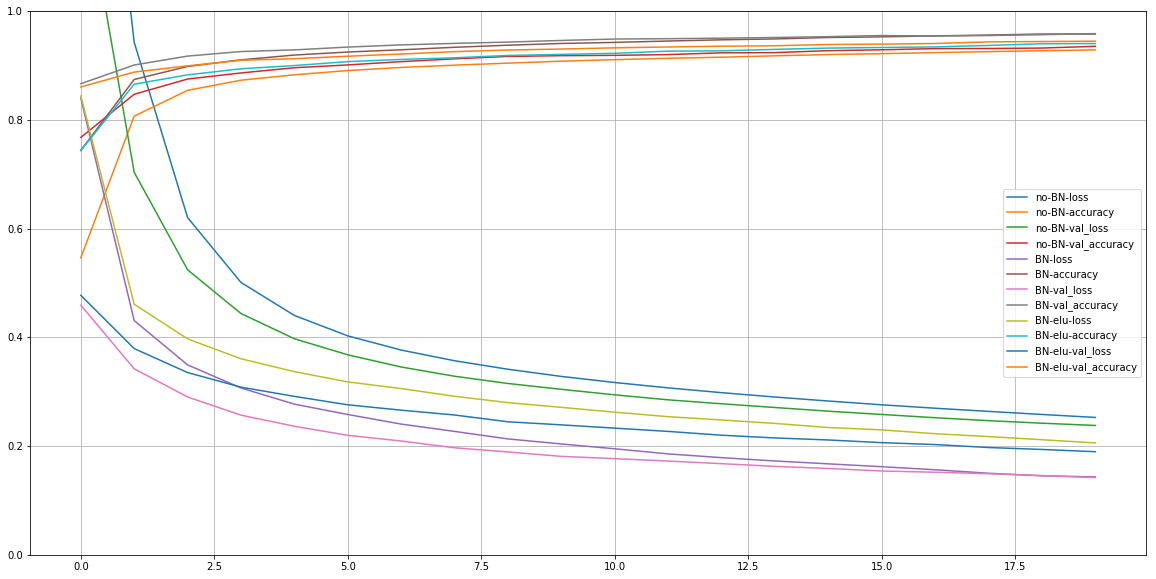

In [8]:
draw_histories([history_wo_batch_normalization,
                history_w_batch_normalization, 
                history_w_batch_normalization_elu], 
               ["no-BN","BN","BN-elu"])